In [ ]:
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.stats import ttest_ind

___Chapter 5: Problem 9___

In [68]:
boston_df = load_data('Boston')
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


(a) Based on this data set, provide an estimate for the population mean of _medv_. Call this estimate µˆ.


In [33]:
mean_hat = boston_df['medv'].mean()
print("Population mean of medv or µˆ =", mean_hat)

Population mean of medv or µˆ = 22.532806324110677


(b) Provide an estimate of the standard error of µˆ. Interpret this result.

In [32]:
def standard_error_mean(df):
    return np.std(df) / np.sqrt(len(df))

print("Estimate standard error of ˆµ =", standard_error_mean(boston_df['medv']))

Estimate standard error of ˆµ = 0.4084569346972866


(c) Now estimate the standard error of µˆ using the bootstrap. How does this compare to your answer from (b)?

In [ ]:
def bootstrap_standard_error(data, samples=10000):
    results = []
    n = len(data)
    
    for _ in range(samples):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        results.append(np.mean(bootstrap_sample))
    
    return np.std(results)

# bootstrap SE for mean
bootstrap_se = bootstrap_standard_error(boston_df['medv'])
print(f"Bootstrap SE: {bootstrap_se}")

# Seed for reproducibilty
np.random.seed(42)
bootstrap_se_seeded = bootstrap_standard_error(boston_df['medv'])
print(f"Bootstrap SE (seeded): {bootstrap_se_seeded}")

print("\n")

analysis = "The bootstrap approach is computationally more expensive, but has the advantage that gives a remarkably good estimate of the standard error, when compared to the same estimate derived analytically."
print(textwrap.fill(analysis, 100))

Bootstrap SE: 0.40493988938932596
Bootstrap SE (seeded): 0.4051470768150291


The bootstrap approach is computationally more expensive, but has the advantage that gives a
remarkably good estimate of the standard error, when compared to the same estimate derived
analytically.


(d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results obtained by using Boston['medv'].std() and the two standard error rule.

In [47]:
conf_low = mean_hat - (2*bootstrap_se_seeded)
conf_hi  = mean_hat + (2*bootstrap_se_seeded)

pd.Series({'mu': mean_hat, 
           'SE': bootstrap_se_seeded,
           '-2SE': conf_low,
           '+2SE': conf_hi})

mu      22.532806
SE       0.405147
-2SE    21.722512
+2SE    23.343100
dtype: float64

(e) Based on this data set, provide an estimate, µˆmed, for the median value of medv in the population.

In [ ]:
median_hat = np.median(boston_df['medv'])
print("Median hat for medv =", median_hat)

Median hat for medv = 21.2


(f) We now would like to estimate the standard error of µˆmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [ ]:
def bootstrap_standard_error_median(data, samples=10000):
    results = []
    n = len(data)
    
    for _ in range(samples):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        results.append(np.median(bootstrap_sample))  # Changed from np.mean to np.median
    
    return np.std(results)

# bootstrap SE for median
bootstrap_se_median = bootstrap_standard_error_median(boston_df['medv'])
print(f"Bootstrap SE for median: {bootstrap_se_median}")

# Seed for reproducibilty
np.random.seed(42)
bootstrap_se_median_seeded = bootstrap_standard_error_median(boston_df['medv'])
print(f"Bootstrap SE for median (seeded): {bootstrap_se_median_seeded}")

print("\n")

analysis = "The estimated standard error for the median value of medv is slightly lower than the estimated standard error for the mean."
print(textwrap.fill(analysis, 100))

Bootstrap SE for median: 0.37628153170199535
Bootstrap SE for median (seeded): 0.37698037296389814


The estimated standard error for the median value of medv is slightly lower than the estimated
standard error for the mean.


(g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity µˆ0.1.

In [52]:
tenth_perc_medv = np.percentile(boston_df['medv'], 10)
print("The tenth percentile of medv =", tenth_perc_medv)

The tenth percentile of medv = 12.75


(h) Use the bootstrap to estimate the standard error of µˆ0.1. Comment on your findings.

In [ ]:
def bootstrap_standard_error_percentile(data, percentile=10, samples=10000):
    results = []
    n = len(data)
    
    for _ in range(samples):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        results.append(np.percentile(bootstrap_sample, percentile))  # Calculate percentile
    
    return np.std(results)

# bootstrap SE for 10th percentile
bootstrap_se_p10 = bootstrap_standard_error_percentile(boston_df['medv'], percentile=10)
print(f"Bootstrap SE for 10th percentile: {bootstrap_se_p10}")

# Seed for reproducibilty
np.random.seed(42)
bootstrap_se_p10_seeded = bootstrap_standard_error_percentile(boston_df['medv'], percentile=10)
print(f"Bootstrap SE for 10th percentile (seeded): {bootstrap_se_p10_seeded}")

print("\n")

analysis = "The estimated standard error for the 10th percentile value of medv is slightly higher than the estimated standard error for the mean and much higher than the estimated standard error for the median."
print(textwrap.fill(analysis, 100))

Bootstrap SE for 10th percentile: 0.5051002015442084
Bootstrap SE for 10th percentile (seeded): 0.5005240397823065


The estimated standard error for the 10th percentile value of medv is slightly higher than the
estimated standard error for the mean and much higher than the estimated standard error for the
median.


___Chapter 12: Problem 10___

 (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [ ]:
# Parameters
observations = 20
classes = 3
variables = 50

data = []
true_labels = []

# Class 1: Mean Shift of 0
class1 = np.random.normal(0, 1, (observations, variables))
data.append(class1)
true_labels.extend([1] * observations)

# Class 2: Mean shift of 2
class2 = np.random.normal(2, 1, (observations, variables))
data.append(class2)
true_labels.extend([2] * observations)

# Class 3: Mean shift of -2
class3 = np.random.normal(-2, 1, (observations, variables))
data.append(class3)
true_labels.extend([3] * observations)

# Combine all data
X = np.vstack(data)
y = np.array(true_labels)

feature_names = [f'Var{i+1}' for i in range(variables)]
df = pd.DataFrame(X, columns=feature_names)
df['True_Class'] = y

df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,True_Class
0,-0.544399,-0.558920,1.318709,-0.519550,-0.306141,1.201315,1.435893,-0.204501,-1.310392,-1.178934,...,-0.046461,-1.041164,-0.882936,-1.179501,-0.830378,0.090047,1.156658,1.657630,0.293835,1
1,1.829376,-0.066439,-0.244629,-1.035686,0.995629,1.652071,1.232628,-2.173996,-0.279357,2.170019,...,-1.212553,0.198891,0.604583,-0.823459,-0.862896,0.580907,-1.971482,1.185722,2.233948,1
2,-0.492990,-0.687836,-0.234453,-1.538903,1.791078,0.540853,-0.636026,-0.829637,-0.785418,-0.791409,...,1.285302,-0.504567,0.460289,-0.460813,0.654117,-0.098807,1.605426,1.330730,0.979709,1
3,0.185715,-3.186614,-0.032531,0.685203,-1.050911,1.193003,0.011841,-1.622317,0.331472,0.064889,...,0.645134,1.575796,1.181574,-0.434845,-0.766303,-0.178959,0.538516,-0.333132,1.127944,1
4,0.540935,-0.380156,-0.749751,0.682351,0.221613,-0.668070,-1.958396,-0.113913,-1.621809,-1.661053,...,-1.798627,-1.092710,-0.588564,1.824328,0.508905,2.065861,1.696122,0.382500,0.404625,1


 (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

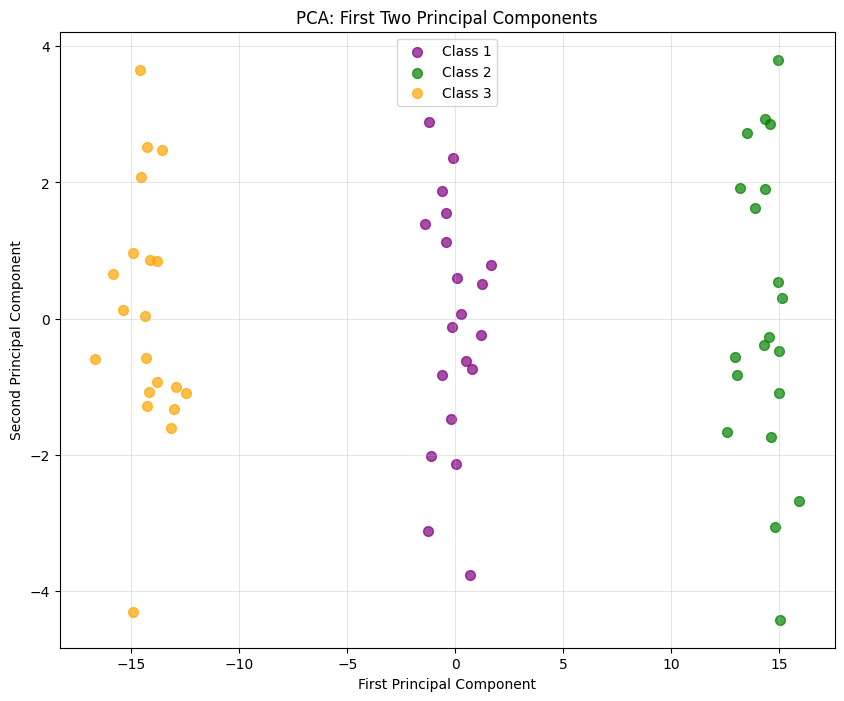

In [ ]:
X_features = df.drop('True_Class', axis=1)  # Features only
pca = PCA()
X_pca = pca.fit_transform(X_features)

# First two principal component scores
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

# Plot
plt.figure(figsize=(10, 8))
colors = ['purple', 'green', 'orange']
class_names = ['Class 1', 'Class 2', 'Class 3']

for i, class_num in enumerate([1, 2, 3]):
    mask = df['True_Class'] == class_num
    plt.scatter(pc1[mask], pc2[mask], 
               c=colors[i], 
               label=class_names[i], 
               alpha=0.7,
               s=50)

plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


(c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

In [ ]:
# K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_features)

df['Cluster_Label'] = cluster_labels
crosstab = pd.crosstab(df['True_Class'], df['Cluster_Label'], 
                       rownames=['True Class'], colnames=['K-means Cluster'])

print("Crosstab: True Class vs K-means Clusters")
print(crosstab)

print("\n")

analysis = "K-means clusters are labeled 0, 1, 2 while true classes are 1, 2, 3. This is a Perfect clustering as it would show each row of the crosstab having all 20 observations in one column."
print(textwrap.fill(analysis, 100))

Crosstab: True Class vs K-means Clusters
K-means Cluster   0   1   2
True Class                 
1                 0   0  20
2                20   0   0
3                 0  20   0


K-means clusters are labeled 0, 1, 2 while true classes are 1, 2, 3. This is a Perfect clustering as
it would show each row of the crosstab having all 20 observations in one column.


(d) Perform K-means clustering with K=2. Describe your results.

In [30]:
# K-means clustering with K=2
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels_k2 = kmeans_k2.fit_predict(X_features)

df_k2 = df.copy()
df_k2['Cluster_Label_K2'] = cluster_labels_k2

crosstab_k2 = pd.crosstab(df_k2['True_Class'], df_k2['Cluster_Label_K2'], 
                          rownames=['True Class'], colnames=['K-means Cluster (K=2)'])

print("Crosstab: True Class vs K-means Clusters (K=2)")
print(crosstab_k2)

print("\n")

analysis = "K-means clusters are labeled 0, 1 while true classes are 1, 2, 3. This is a Forced Grouping as the algorithm must group 3 distinct classes into only 2 clusters."
print(textwrap.fill(analysis, 100))

Crosstab: True Class vs K-means Clusters (K=2)
K-means Cluster (K=2)   0   1
True Class                   
1                       0  20
2                      20   0
3                       0  20


K-means clusters are labeled 0, 1 while true classes are 1, 2, 3. This is a Forced Grouping as the
algorithm must group 3 distinct classes into only 2 clusters.


(e) Now perform K-means clustering with K=4, and describe your results.

In [32]:
# K-means clustering with K=4
kmeans_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_k4 = kmeans_k4.fit_predict(X_features)

df_k4 = df.copy()
df_k4['Cluster_Label_K4'] = cluster_labels_k4

crosstab_k4 = pd.crosstab(df_k4['True_Class'], df_k4['Cluster_Label_K4'], 
                          rownames=['True Class'], colnames=['K-means Cluster (K=4)'])

print("Crosstab: True Class vs K-means Clusters (K=4)")
print(crosstab_k4)

print("\n")

analysis = "K-means clusters are labeled 0, 1, 2, 3 while true classes are 1, 2, 3. This is over clustering as all 4 clusters must contain observations since we have only 3 true classes, at least one true class must be artificially split into multiple clusters."
print(textwrap.fill(analysis, 100))

Crosstab: True Class vs K-means Clusters (K=4)
K-means Cluster (K=4)  0   1   2   3
True Class                          
1                      8   0   0  12
2                      0   0  20   0
3                      0  20   0   0


K-means clusters are labeled 0, 1, 2, 3 while true classes are 1, 2, 3. This is over clustering as
all 4 clusters must contain observations since we have only 3 true classes, at least one true class
must be artificially split into multiple clusters.


(f) Now perform K-means clustering with K=3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60x2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [ ]:
# Extract the 60 x 2 matrix
X_pca_2d = X_pca[:, :2] 

# K-means clustering with K=3 on the above
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca_2d)

df_pca = pd.DataFrame({
    'PC1': X_pca_2d[:, 0],
    'PC2': X_pca_2d[:, 1], 
    'True_Class': y,
    'Cluster_PCA': cluster_labels_pca
})

crosstab_pca = pd.crosstab(df_pca['True_Class'], df_pca['Cluster_PCA'], 
                          rownames=['True Class'], colnames=['K-means on PCA'])

print("Crosstab: True Class vs K-means Clusters (on the 60 x 2 matrix)")
print(crosstab_pca)

print("\n")

analysis = "K-means clusters on PCA are labeled 0, 1, 2 while true classes are 1, 2, 3. I think we have a SIMILAR PERFORMANCE as clustering is performed similarly as seen in (c)."
print(textwrap.fill(analysis, 100))


Crosstab: True Class vs K-means Clusters (on the 60 x 2 matrix)
K-means on PCA   0   1   2
True Class                
1                0   0  20
2               20   0   0
3                0  20   0


K-means clusters on PCA are labeled 0, 1, 2 while true classes are 1, 2, 3. I think we have a
SIMILAR PERFORMANCE as clustering is performed similarly as seen in (c).


(g) Using the StandardScaler() estimator, perform K-means clustering with K =3on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [45]:
# Initialize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

print("Std devs:", X_scaled[:, :3].std(axis=0))

# K-means clustering with K=3 on scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels_scaled = kmeans_scaled.fit_predict(X_scaled)

df_scaled = df.copy()
df_scaled['Cluster_Scaled'] = cluster_labels_scaled

crosstab_scaled = pd.crosstab(df_scaled['True_Class'], df_scaled['Cluster_Scaled'], 
                             rownames=['True Class'], colnames=['K-means on Scaled Data'])

print("Crosstab: True Class vs K-means Clusters (Scaled Data)")
print(crosstab_scaled)

print("\n")

analysis = "K-means clusters on PCA are labeled 0, 1, 2 while true classes are 1, 2, 3. I think we have a SIMILAR PERFORMANCE as seen in (c). In my case, I generated all 50 variables with the same variance. Therefore, scaling should have minimal impact on the clustering results."
print(textwrap.fill(analysis, 100))


Std devs: [1. 1. 1.]
Crosstab: True Class vs K-means Clusters (Scaled Data)
K-means on Scaled Data   0   1   2
True Class                        
1                        0   0  20
2                       20   0   0
3                        0  20   0


K-means clusters on PCA are labeled 0, 1, 2 while true classes are 1, 2, 3. I think we have a
SIMILAR PERFORMANCE as seen in (c). In my case, I generated all 50 variables with the same variance.
Therefore, scaling should have minimal impact on the clustering results.


___Chapter 12: Problem 13___

(a) Load in the data using pd.read_csv(). You will need to select header = None.

In [47]:
gene_expression_data = pd.read_csv('Ch12Ex13.csv', header=None)

 (b) Apply hierarchical clustering to the samples using correlation based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

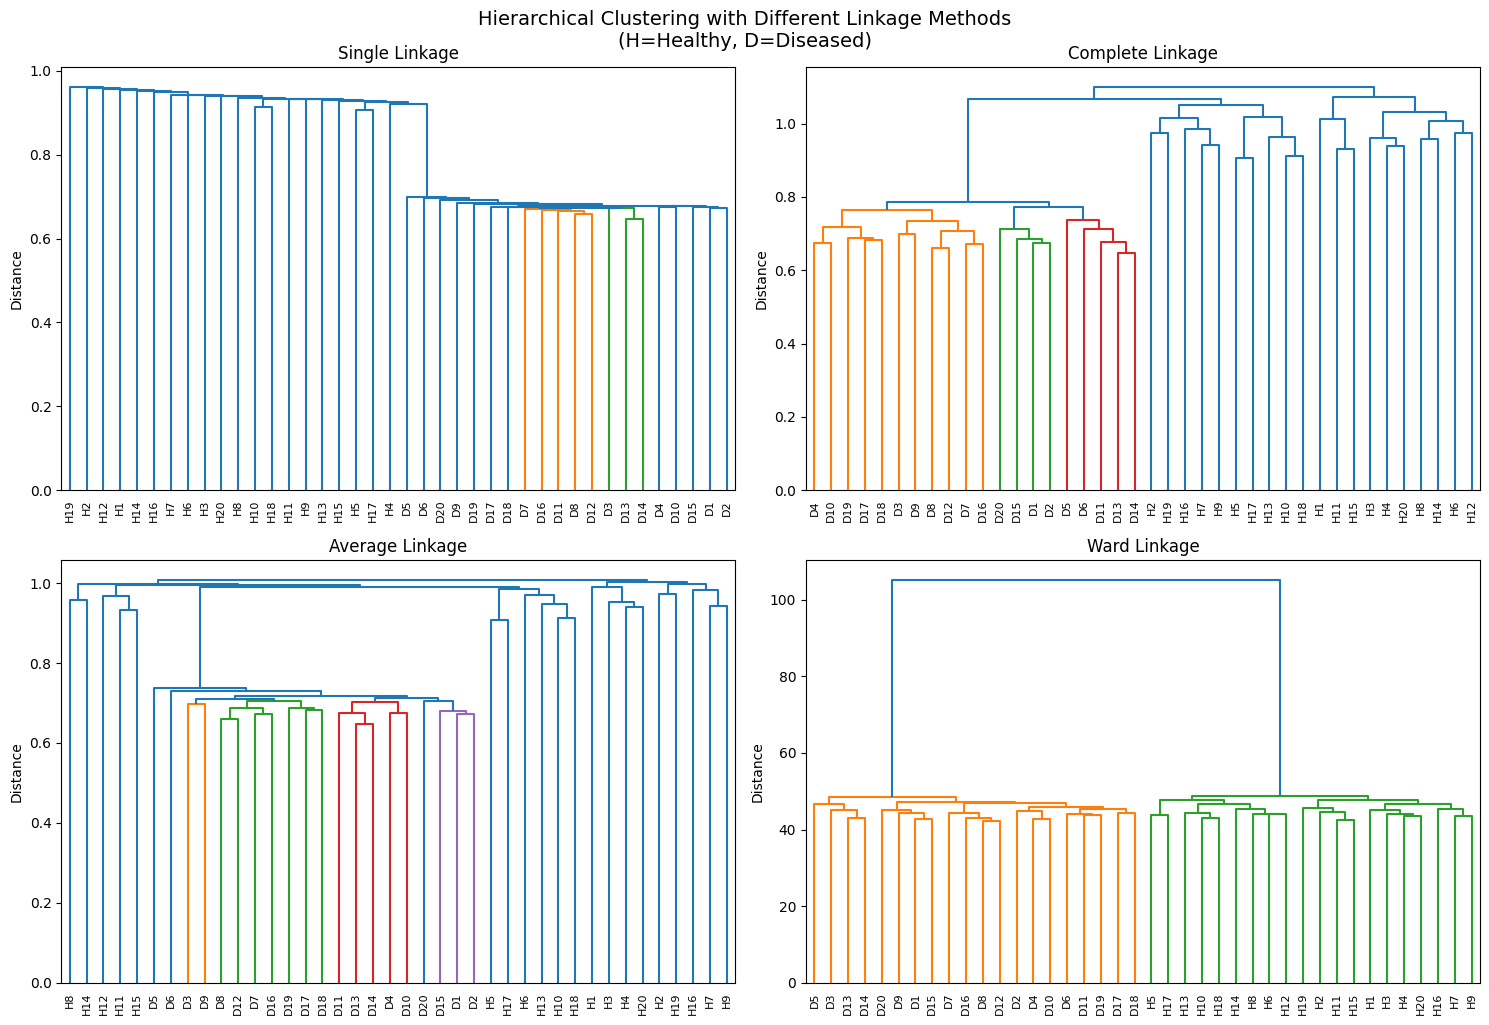



Yes the genes separate the samples into two groups but only with Complete and Ward Linkage so I
guess yes the results were dependent on the type of linkage used.


In [ ]:
data = gene_expression_data.values.T

correlation_distance = pdist(data, metric='correlation')
linkage_methods = ['single', 'complete', 'average', 'ward']
sample_labels = [f'H{i+1}' for i in range(20)] + [f'D{i+1}' for i in range(20)]

# Plot dendrograms for different linkage methods
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, method in enumerate(linkage_methods):
    if method == 'ward':
        Z = linkage(data, method='ward')
    else:
        Z = linkage(correlation_distance, method=method)
    
    dendrogram(Z, labels=sample_labels, ax=axes[i], leaf_rotation=90, leaf_font_size=8)
    axes[i].set_title(f'{method.capitalize()} Linkage')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.suptitle('Hierarchical Clustering with Different Linkage Methods\n(H=Healthy, D=Diseased)', 
             fontsize=14, y=1.02)
plt.show()

print("\n")

analysis = "Yes the genes separate the samples into two groups but only with Complete and Ward Linkage so I guess yes the results were dependent on the type of linkage used."
print(textwrap.fill(analysis, 100))

(c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

In [67]:
data = gene_expression_data.values.T

healthy_samples = data[:20, :]  # First 20 samples
diseased_samples = data[20:, :]  # Last 20 samples

# Method: Two-sample t-test for each gene
# This tests if the mean expression differs significantly between groups

t_statistics = []
p_values = []
mean_differences = []

for gene_idx in range(data.shape[1]):
    healthy_expr = healthy_samples[:, gene_idx]
    diseased_expr = diseased_samples[:, gene_idx]
    
    t_stat, p_val = ttest_ind(healthy_expr, diseased_expr)
    mean_diff = np.mean(diseased_expr) - np.mean(healthy_expr)
    
    t_statistics.append(t_stat)
    p_values.append(p_val)
    mean_differences.append(mean_diff)

t_statistics = np.array(t_statistics)
p_values = np.array(p_values)
mean_differences = np.array(mean_differences)

top_indices = np.argsort(np.abs(t_statistics))[::-1]
print(f"Most significant gene: Gene {top_indices[0]}")

Most significant gene: Gene 501
